In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rc('font', family='Malgun Gothic')
# cnt, PNG, UNDERBAR = 0, '.png', '_'
# CHART_NAME = 'brokenLineExam'
filename = './../data/주요발생국가주간동향(4월2째주).csv'

In [5]:
data = pd.read_csv(filename, index_col='국가')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [6]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [7]:
type(chartdata)

pandas.core.series.Series

Text(0.5, 1.0, '4월 6일 코로나 발생 건수')

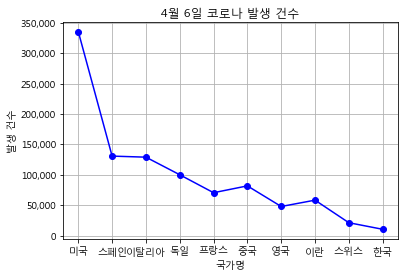

In [8]:
YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
plt.plot(chartdata, color='blue', linestyle='solid', marker='o')
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.grid(True)
plt.xlabel('국가명')

plt.ylabel("발생 건수")
plt.title('4월 6일 코로나 발생 건수')

In [9]:
COUNTRY = ['스페인', '프랑스', '독일', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
chartdata = data.loc[COUNTRY, WHEN]
chartdata = chartdata.T
chartdata.columns

Index(['스페인', '프랑스', '독일', '중국', '영국', '이란'], dtype='object', name='국가')

In [10]:
chartdata

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


Text(0.5, 1.0, '일자별 국가명 꺽은 선')

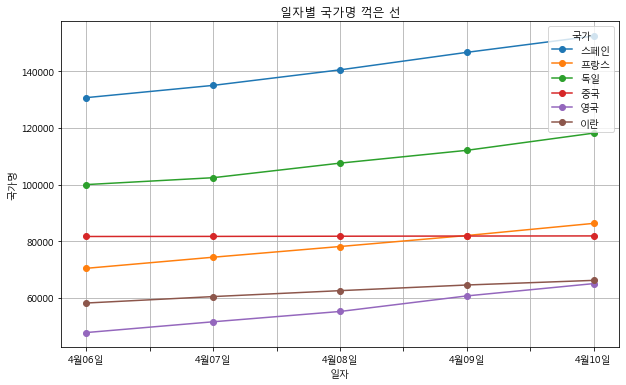

In [11]:
chartdata.plot(title='SomeTitie', figsize=(10, 6), legend = True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('일자')
plt.ylabel('국가명')
plt.title('일자별 국가명 꺽은 선')

In [12]:
tipsfile = './../data/tips.csv'
myframe = pd.read_csv(tipsfile)
myframe = myframe.head(100)
myframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   total_bill  100 non-null    float64
 2   tip         100 non-null    float64
 3   sex         100 non-null    object 
 4   smoker      100 non-null    object 
 5   day         100 non-null    object 
 6   time        100 non-null    object 
 7   size        100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


In [13]:
myframe.describe()

,Unnamed: 0,total_bill,tip,size
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,19.616700,3.059000,2.520000
std,29.011492,7.917297,1.287689,0.822413
min,0.000000,3.070000,1.000000,1.000000
25%,24.750000,14.817500,2.007500,2.000000
50%,49.500000,18.160000,3.000000,2.000000
75%,74.250000,22.990000,3.602500,3.000000
max,99.000000,48.270000,7.580000,4.000000


In [14]:
len(myframe)

100

In [15]:
xrange = range(len(myframe))
data_bill = myframe.loc[:, ['total_bill']]
data_tip = myframe.loc[:, ['tip']]

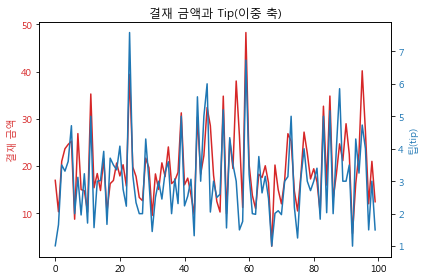

In [16]:
fig, ax1 = plt.subplots()
ax1.set_title('결재 금액과 Tip(이중 축)')

color = 'tab:red'

ax1.set_ylabel('결재 금액', color=color)
ax1.plot(xrange, data_bill, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('팁(tip)', color=color)  # we already handled the x-label with ax1
ax2.plot(xrange, data_tip, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# otherwise the right y-label is slightly clipped
fig.tight_layout()